In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load DataSet

In [2]:
try:
    fitness = pd.read_csv('CardioGoodFitness.csv')
    print('Let\'s go..............')
except:
    print('Bad code................')

Let's go..............


# Part 1

In [3]:
# first 5 elements
fitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# last 5 elements
fitness.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


======

* The sample data shows different model numbers of the Product
* Observations on customer's age, education, income and gender
* Observations on the average usage, average miles run/week and also the self fitness rating of the customers

=======

In [5]:
# Check columns -> 

fitness.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
fitness.index

RangeIndex(start=0, stop=180, step=1)

In [7]:
# Checking the shape of the dataset

fitness.shape

(180, 9)

*  There are 180 rows and 9 columns in the dataset

In [8]:
# More understanding of the dataset -> 

fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
# check datatypes of all the columns -> 

fitness.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
# count number of items

fitness.count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

In [11]:
# General Statistics

fitness.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


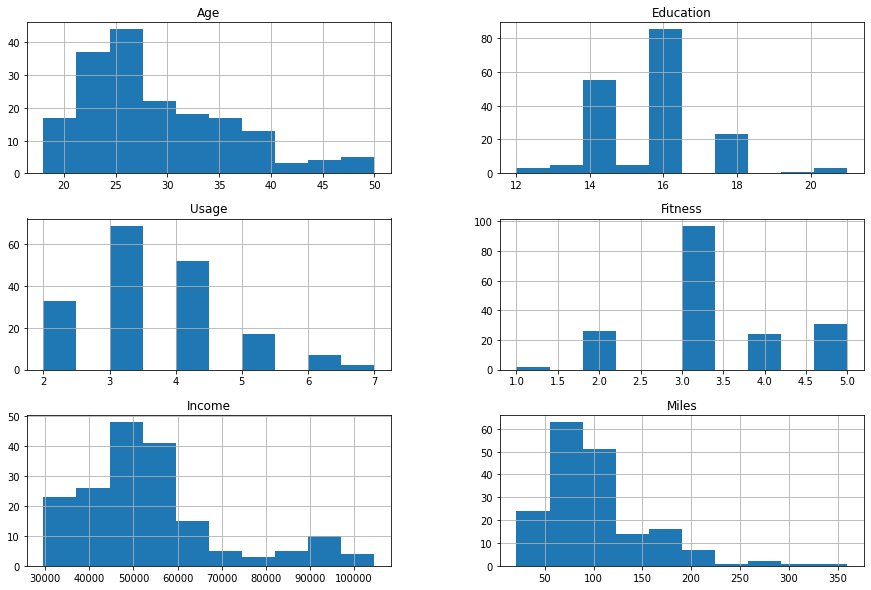

In [14]:
# check hist

fitness.hist(figsize=(15, 10))
plt.show()

In [15]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

fitness.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Text(0.5, 1.0, 'Cardinality')

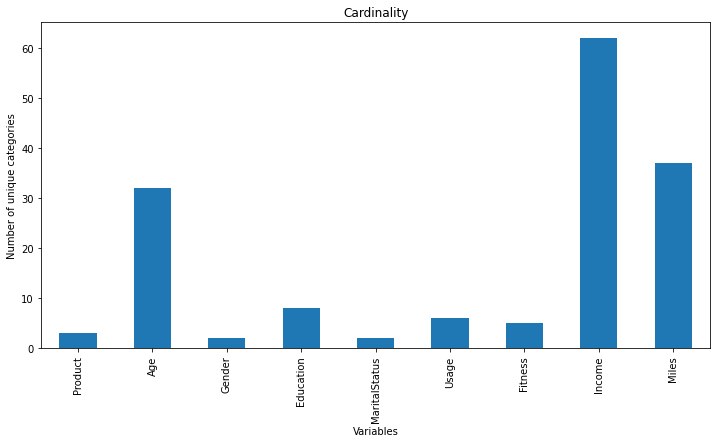

In [16]:
# plot the cardinality:

fitness.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [18]:
# display categorical features/columns -> 

categorical_columns = fitness.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

In [19]:
# display numerical features/columns -> 

numerical_columns = fitness.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')

# Part 2

In [12]:
# Let's replace the empty strings with NaN values

fitness= fitness.replace(' ', np.nan)

# Let's replace the question marks (?) with NaN values

fitness= fitness.replace('?', np.nan)

# Let's replace the question marks (.) with NaN values

fitness= fitness.replace('.', np.nan)

# Let's replace \N (always add an extra forward class)-> (\\N) with NaN values

fitness= fitness.replace('\\N', np.nan)

In [20]:
# check for duplicate rows in the dataset -> 

fitness.duplicated().sum()

0

In [21]:
# check missing values -> 

fitness.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [22]:
fitness.isnull().sum().sum()

0

In [23]:
# print names or check all columns which have null values -> 

[val for val in fitness.columns if fitness[val].isnull().sum() > 0]

[]

# Part 3

In [24]:
fitness.sample(n=2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
85,TM498,21,Male,16,Partnered,2,2,34110,42
65,TM195,35,Female,18,Single,3,3,67083,85


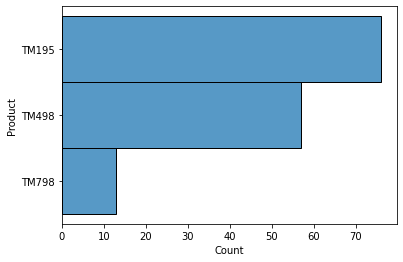

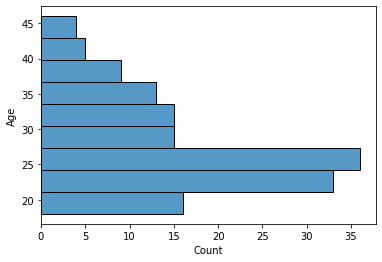

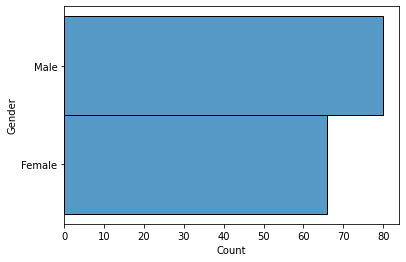

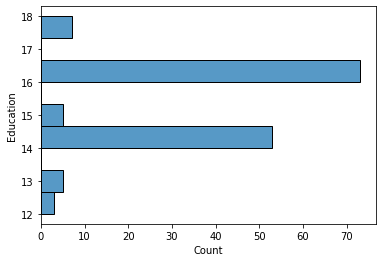

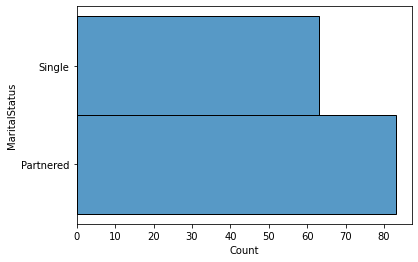

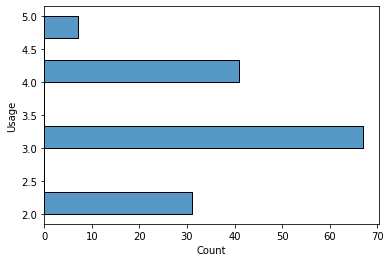

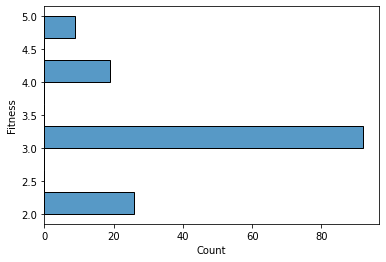

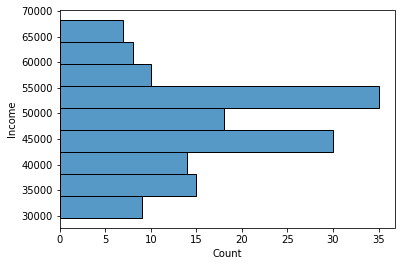

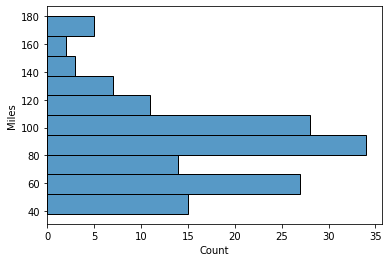

In [109]:
def col(j):
    sns.histplot(y = fitness[j])
    plt.show()
    
for j in fitness.columns:
    col(j)

======

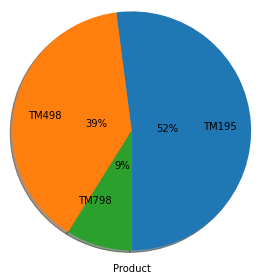

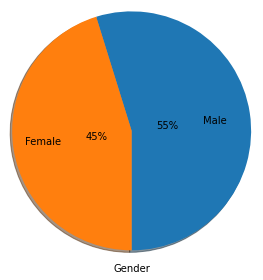

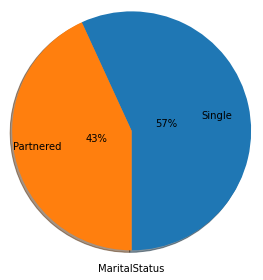

In [112]:
### `Pie Chart of all the columns`

def pie(j):
    labels = list(fitness[j].unique())
    sizes = list(fitness[j].value_counts())
    
    plt.pie(sizes,
            labels = labels,
            autopct = "%1.0f%%",
            startangle = 270,
            shadow = True,
            pctdistance=0.3,
            labeldistance=0.6,
            radius =1.2,
            textprops = {"fontsize": 10}
        )

    plt.xlabel("{}".format(j))
            
    plt.tight_layout()
    plt.show()
            
for j in fitness.select_dtypes(include = "object"):
    pie(j)

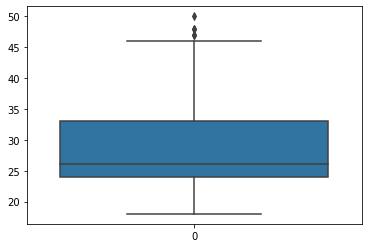

In [25]:
# Check for outliers in Age column:

sns.boxplot(fitness['Age'])
plt.show()

In [29]:
# checking the  position of outlier using boxplot for one numerical column

np.where(fitness['Age'] > 47)

(array([ 79, 139, 179], dtype=int64),)

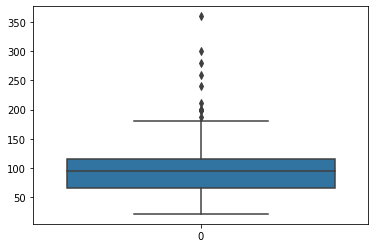

In [30]:
# Check for outliers in Miles:

sns.boxplot(fitness['Miles'])
plt.show()

In [36]:
# checking the  position of outlier using boxplot for one numerical column

np.where(fitness['Miles'] > 199)

(array([ 84, 142, 148, 152, 155, 166, 167, 170, 171, 173, 175, 176],
       dtype=int64),)

In [ ]:
plot = sns.boxplot(x=fitness['Income'])
plot.axes.set_title("Income Distribution", fontsize=20)

In [ ]:
plot = sns.histplot(data=fitness, x="Miles",kde=True)
plot.axes.set_title("Miles Distribution", fontsize=20)

In [38]:
# Now check the entire dataset for outliers

Q3 = fitness.quantile(0.75, numeric_only=True)
Q1 = fitness.quantile(0.25, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64


In [39]:
print(fitness.shape) # old shape

fitness = fitness[~((fitness < (Q1 - 1.5 * IQR)) | (fitness > (Q3 + 1.5 * IQR))).any(axis=1)]

print(fitness.shape) # new shape

(180, 9)


C:\Users\ACT\AppData\Local\Temp\ipykernel_10280\209240113.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fitness = fitness[~((fitness < (Q1 - 1.5 * IQR)) | (fitness > (Q3 + 1.5 * IQR))).any(axis=1)]


(146, 9)


In [41]:
# check skewness

fitness.skew(numeric_only=True)

Age          0.798705
Education   -0.060834
Usage        0.233203
Fitness      0.796245
Income      -0.012868
Miles        0.774367
dtype: float64

In [43]:
# check kurtosis

fitness.kurt(numeric_only=True)

Age         -0.111594
Education   -0.286083
Usage       -0.499750
Fitness      0.984761
Income      -0.528276
Miles        0.820187
dtype: float64

In [45]:
# Checking correlation - how features are correlated

fitness.corr(numeric_only=True).T

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.296460,-0.069262,-0.077163,0.653214,-0.081065
Education,0.296460,1.000000,0.216611,0.266085,0.499156,0.126448
Usage,-0.069262,0.216611,1.000000,0.480794,0.161925,0.660024
Fitness,-0.077163,0.266085,0.480794,1.000000,0.176077,0.712510
Income,0.653214,0.499156,0.161925,0.176077,1.000000,0.169500
Miles,-0.081065,0.126448,0.660024,0.712510,0.169500,1.000000


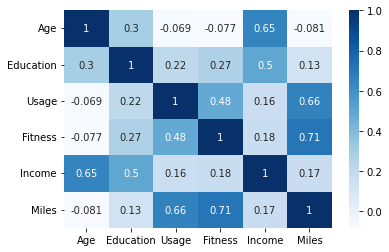

<Figure size 1584x1224 with 0 Axes>

In [52]:
# then plot the correlation of the top most correlated features:

e = fitness.corr(numeric_only=True)
top_correlated_features = e.index
g = sns.heatmap(fitness[top_correlated_features].corr(), annot=True, cmap='Blues')
plt.figure(figsize=(22,17))
plt.show()

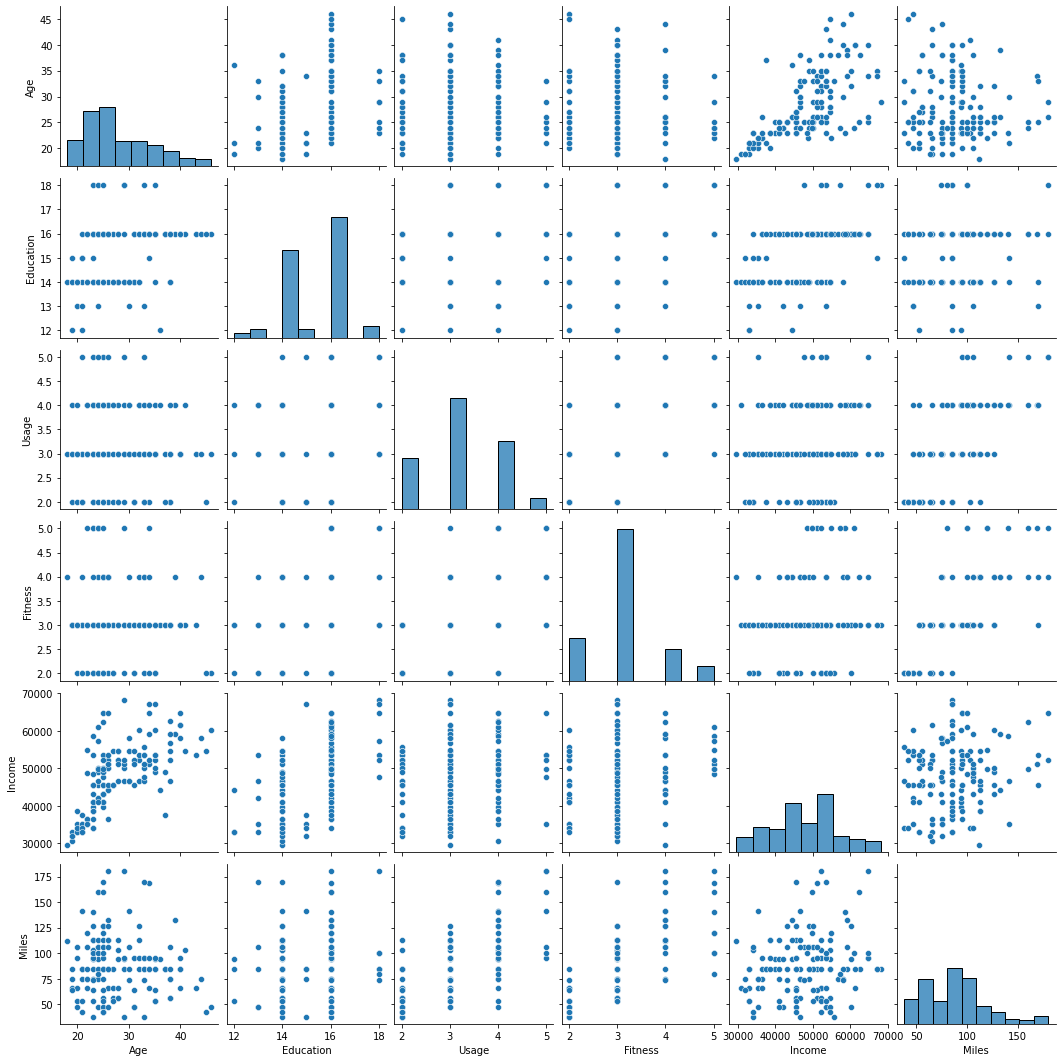

In [53]:
# pairplot of every feature in the dataset

sns.pairplot(fitness)
plt.show()

# Part - 4

### Basic Data Visualization

In [54]:
fitness.sample(n=4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
133,TM498,38,Female,16,Partnered,4,3,62535,85
67,TM195,37,Female,16,Partnered,3,3,37521,85
53,TM195,30,Male,14,Partnered,4,4,46617,141
59,TM195,33,Female,16,Single,2,2,55713,38


Text(0.5, 1.0, 'product distribution')

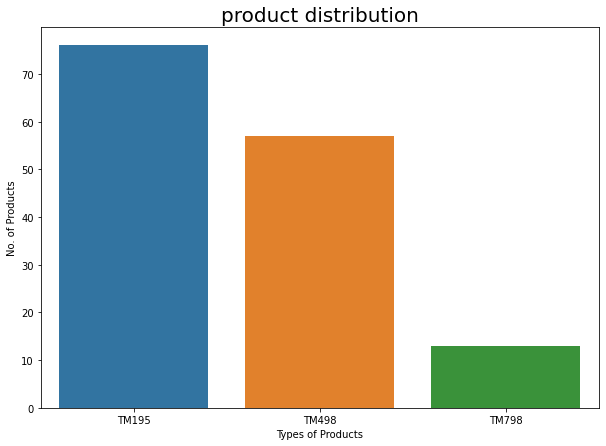

In [88]:
# product distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='Product',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Types of Products')
g.set_ylabel('No. of Products')
g.set_title('product distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Gender distribution')

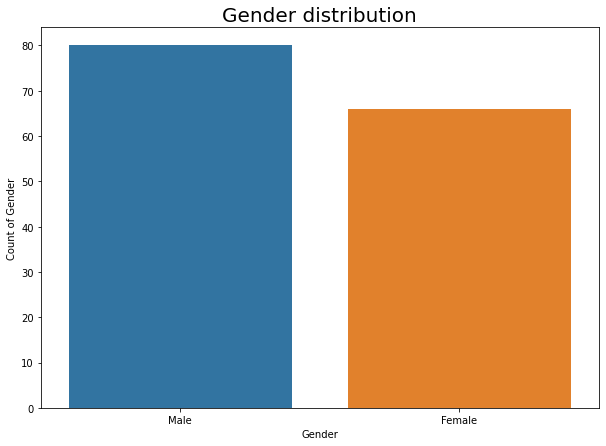

In [87]:
# Gender distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='Gender',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Gender')
g.set_ylabel('Count of Gender')
g.set_title('Gender distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'MaritalStatus Distribution')

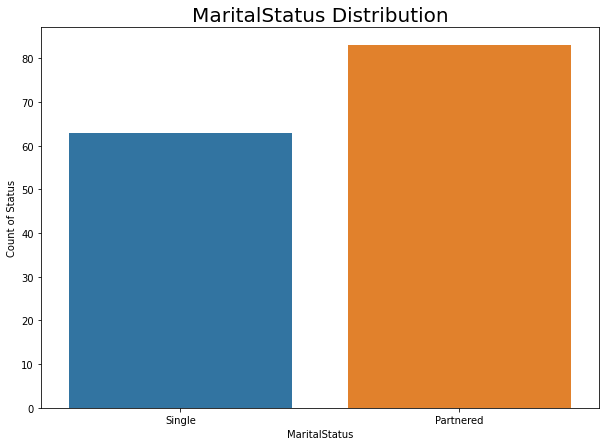

In [86]:
# MaritalStatus distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='MaritalStatus',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('MaritalStatus')
g.set_ylabel('Count of Status')
g.set_title('MaritalStatus Distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Education Distribution')

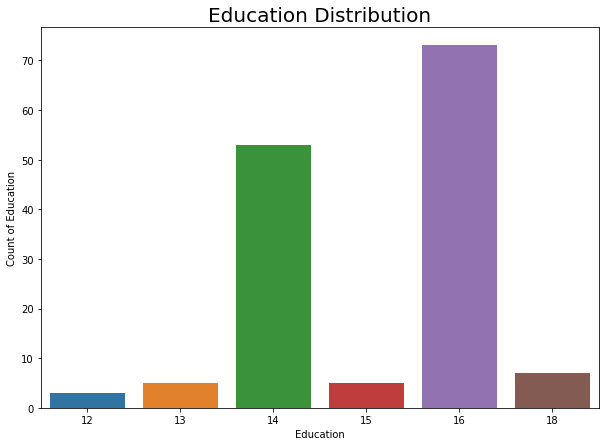

In [85]:
# Education distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='Education',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Education')
g.set_ylabel('Count of Education')
g.set_title('Education Distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Usage Distribution')

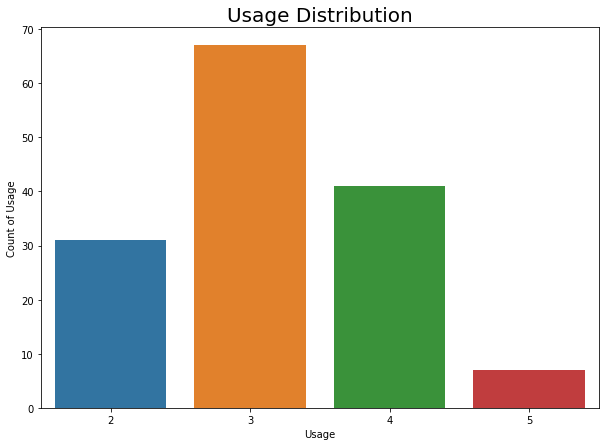

In [94]:
# Usage distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='Usage',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Usage')
g.set_ylabel('Count of Usage')
g.set_title('Usage Distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Fitness Distribution')

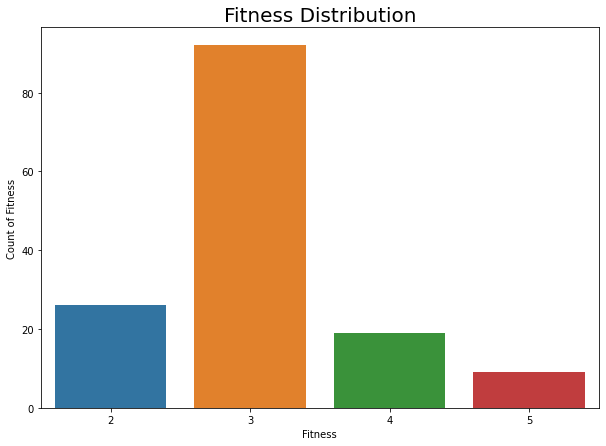

In [84]:
# Fitness distribution

plt.figure(figsize=(10,7))
g = sns.countplot(
    x='Fitness',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Fitness')
g.set_ylabel('Count of Fitness')
g.set_title('Fitness Distribution', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Age Distribution')

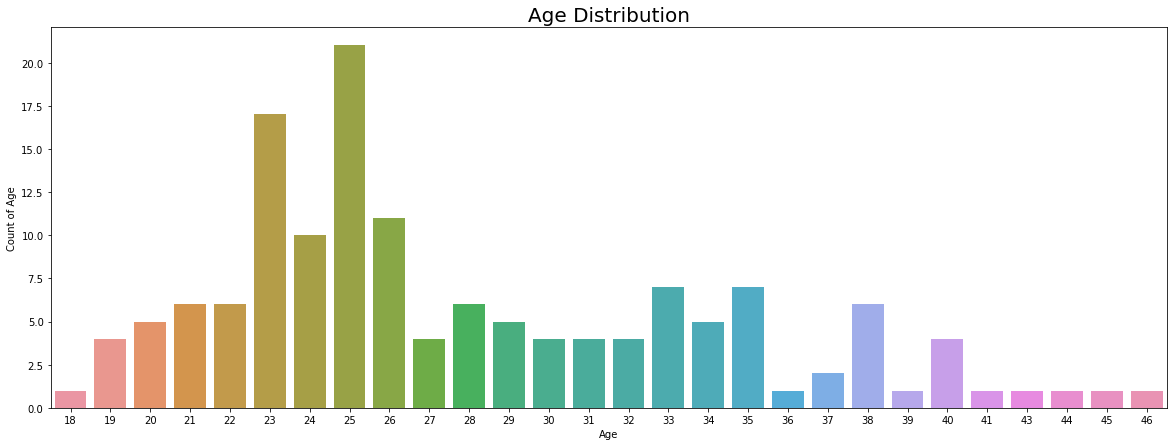

In [89]:
# Age distribution

plt.figure(figsize=(20,7))
g = sns.countplot(
    x='Age',
    data=fitness,
    #palette='Blues_r'
)
g.set_xlabel('Age')
g.set_ylabel('Count of Age')
g.set_title('Age Distribution', fontdict={'fontsize':20})

In [68]:
fitness.sample(n=3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
98,TM498,25,Female,14,Single,3,4,43206,127
134,TM498,38,Male,16,Partnered,3,3,59124,106
21,TM195,23,Male,16,Single,4,3,40932,94


Text(0.5, 1.0, 'Marital Status per Age')

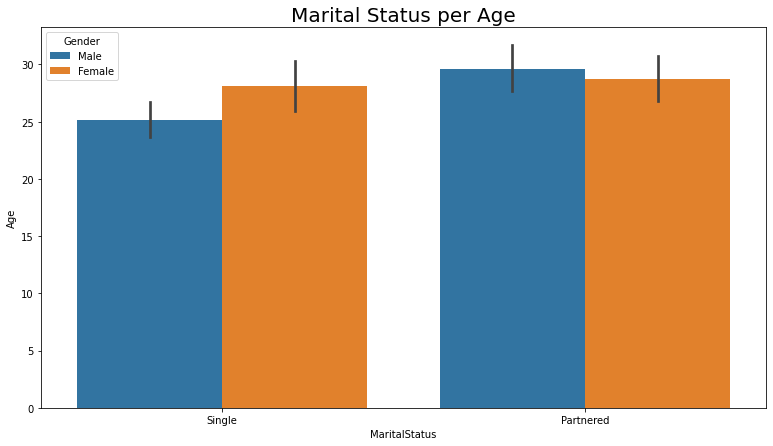

In [92]:
# 49. More visualization

plt.figure(figsize=(13,7))
g = sns.barplot(y='Age', x='MaritalStatus', hue='Gender', data=fitness)
g.set_title('Marital Status per Age', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Gender per Age per Education')

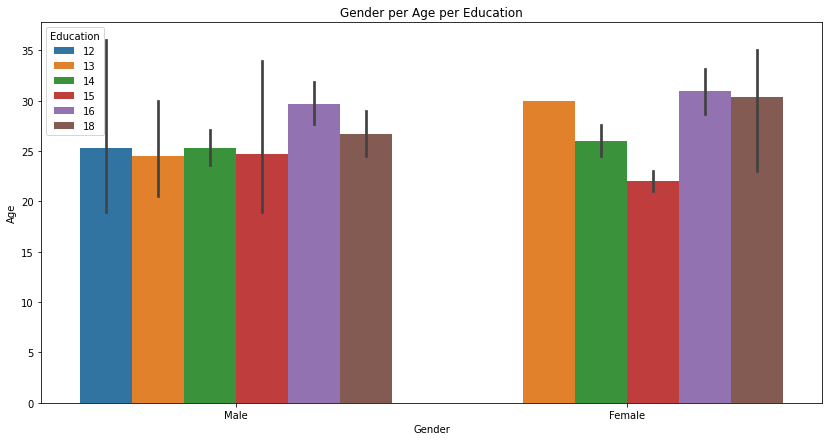

In [93]:
# 49. More visualization

plt.figure(figsize=(14,7))
g = sns.barplot(y='Age', x='Gender', hue='Education', data=fitness)
g.set_title('Gender per Age per Education')

# Age per Miles

<AxesSubplot: xlabel='Age', ylabel='Miles'>

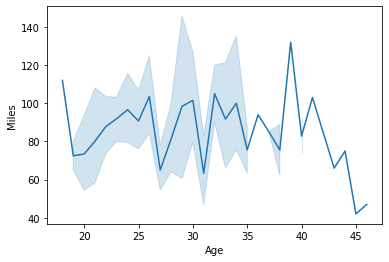

In [113]:
# Age per Miles

sns.lineplot(x = 'Age', y = 'Miles', data = fitness)

# Age per Income

<AxesSubplot: xlabel='Age', ylabel='Income'>

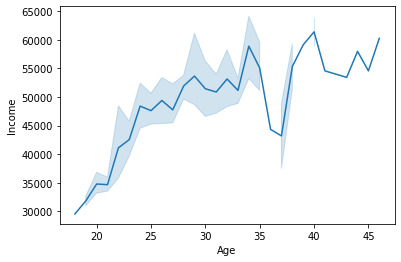

In [114]:
sns.lineplot(x = 'Age', y = 'Income', data = fitness)

# Education per Usage

<AxesSubplot: xlabel='Education', ylabel='Usage'>

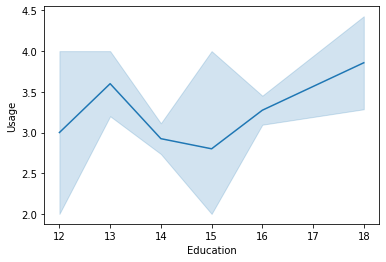

In [116]:
sns.lineplot(x = 'Education', y = 'Usage', data = fitness)

In [115]:
fitness.sample(n=2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
127,TM498,34,Male,15,Single,3,3,67083,85
13,TM195,22,Female,14,Single,3,3,35247,75


## Education per Income

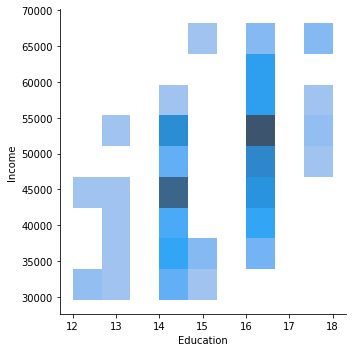

In [97]:
g=sns.displot(data=fitness, x="Education", y="Income")
g.set_titles('Education per Income')

<Figure size 1440x720 with 0 Axes>

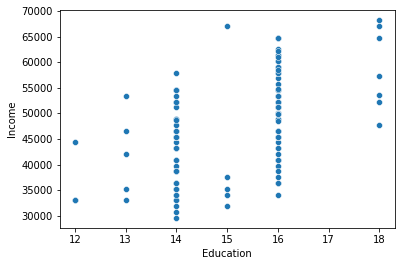

<Figure size 1440x720 with 0 Axes>

In [101]:
sns.scatterplot(data=fitness, x="Education", y="Income")
plt.figure(figsize=(20,10))

# Usage per Income

<AxesSubplot: xlabel='Usage', ylabel='Income'>

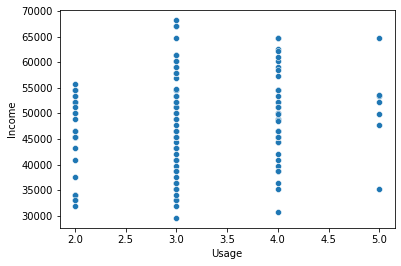

In [102]:
sns.scatterplot(data=fitness, x="Usage", y="Income")

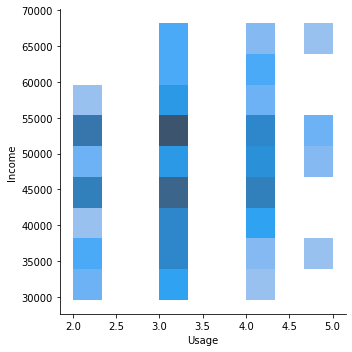

In [103]:
sns.displot(data=fitness, x="Usage", y="Income")

# Age vs Usage

<AxesSubplot: xlabel='Usage', ylabel='Age'>

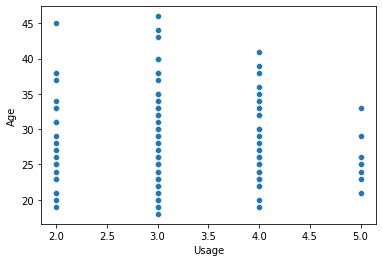

In [104]:
sns.scatterplot(data=fitness, x="Usage", y="Age")

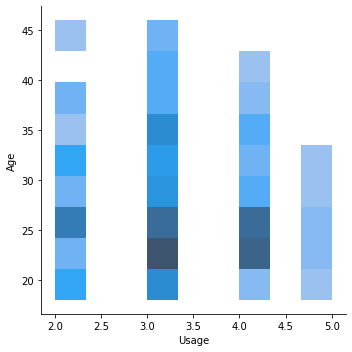

In [105]:
sns.displot(data=fitness, x="Usage", y="Age")

### Fitness vs Miles with Usage

<AxesSubplot: xlabel='Fitness', ylabel='Miles'>

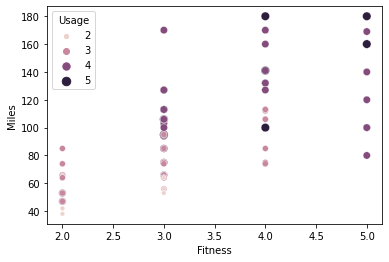

In [106]:
sns.scatterplot(data=fitness, x="Fitness", y="Miles", hue="Usage", size="Usage")

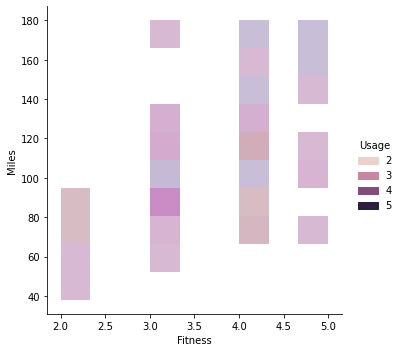

In [108]:
sns.displot(data=fitness, x="Fitness", y="Miles", hue="Usage")

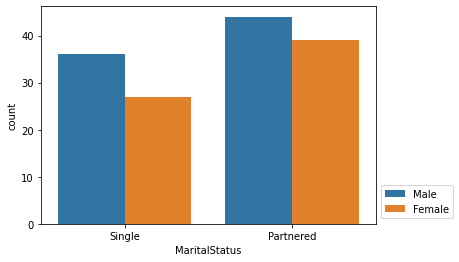

In [117]:
sns.countplot(x = 'MaritalStatus', data = fitness, hue = 'Gender')
plt.legend(bbox_to_anchor = (1,0.2))

# Multivariate Data Analysis

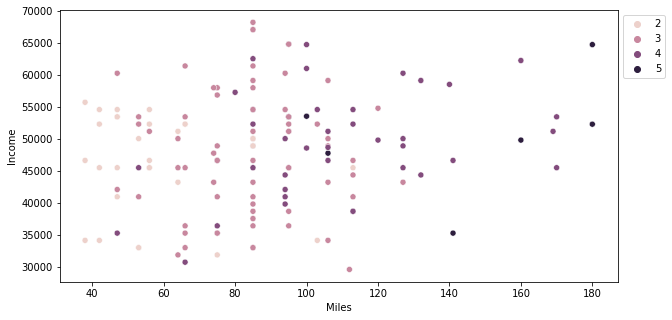

In [118]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Miles', y = 'Income', hue = 'Usage', data = fitness)
plt.legend(bbox_to_anchor=(1,1))

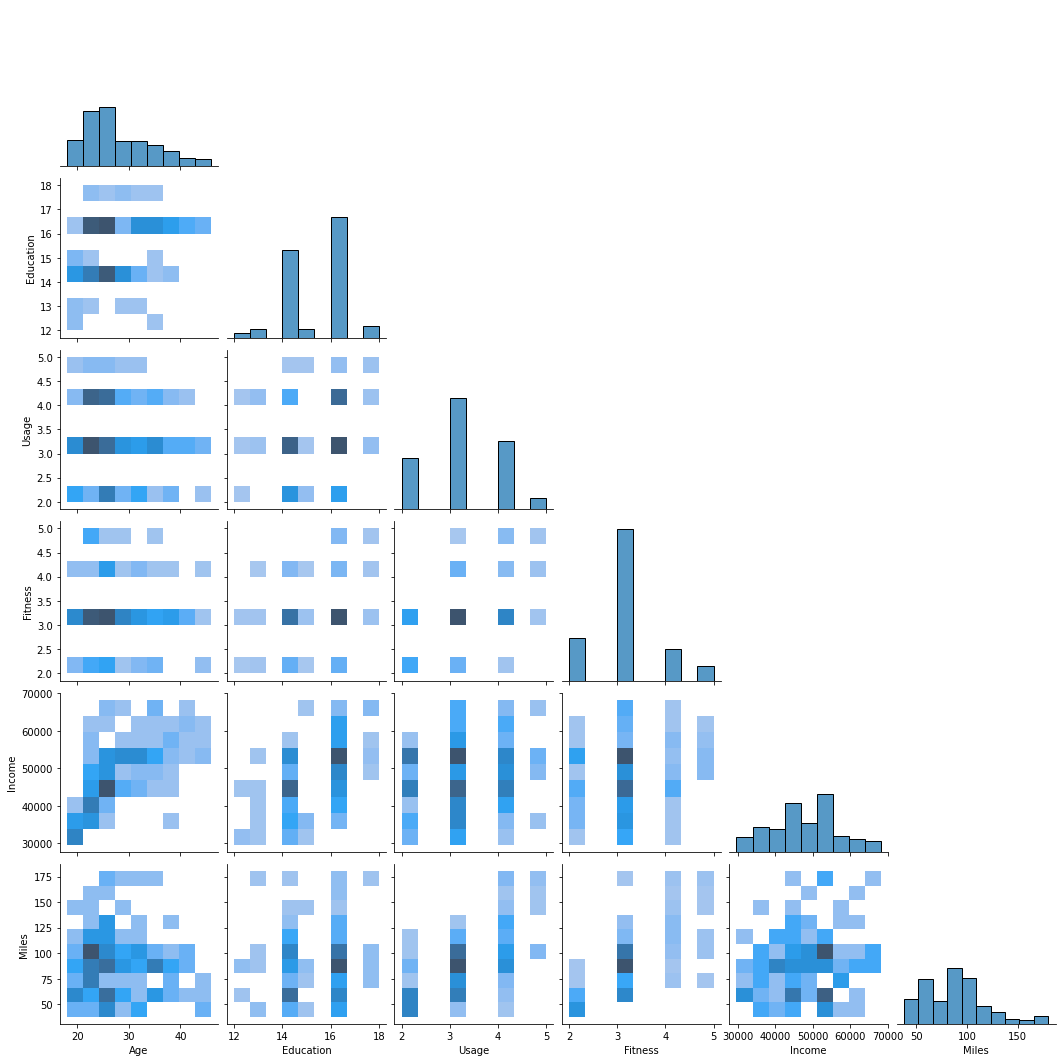

In [119]:
sns.pairplot(fitness, corner = True, kind = 'hist')